# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
response_btc=requests.get(btc_url).json()
btc_price= response_btc["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
response_eth=requests.get(eth_url).json()
eth_price= response_eth["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value= my_btc * btc_price
my_eth_value= (my_eth * eth_price)

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $43166.40
The current value of your 5.3 ETH is $11948.53


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg=200
my_spy=50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key= os.getenv("ALPACA_API_KEY")
alpaca_secret_key= os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca_api=tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")


In [8]:
# Format current date as ISO format
date=pd.Timestamp("2021-06-18", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
ticker_df=alpaca_api.get_barset(tickers, timeframe, start=date, end=date).df

# Preview DataFrame
ticker_df.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-06-18 00:00:00-04:00  115.05  115.39  114.91  115.29  5438261  417.08   

                                                              
                               high    low   close    volume  
time                                                          
2021-06-18 00:00:00-04:00  417.8281  414.7  415.01  92753385

In [9]:
# Pick AGG and SPY close prices
agg_close_price=ticker_df.iloc[0,3]
spy_close_price=ticker_df.iloc[0,8]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.29
Current SPY closing price: $415.01


In [10]:
# Compute the current value of shares
my_agg_value=my_agg * agg_close_price
my_spy_value= my_spy * spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20750.50
The current value of your 200 AGG shares is $23058.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
dict={"amount":[(my_btc_value + my_eth_value), (my_agg_value + my_spy_value)]}
df_savings = pd.DataFrame(data=dict, index=["crypto","shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,55114.932
shares,43808.500


<AxesSubplot:ylabel='amount'>

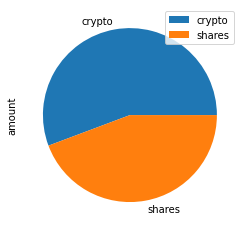

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings=df_savings.sum(axis=0).iloc[0]

# Validate saving health
if savings > emergency_fund:
    print(f"Congratulations! You have enough money in the Emergency Fund.")
elif savings == emergency_fund:
    print(f"Congratulations! You have reached your Emergency Fund goal.")
else:
    print(f"You are ${emergency_fund - savings } away from your Emergency Fudn goals.")

Congratulations! You have enough money in the Emergency Fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-06-18', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-06-18', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data=alpaca_api.get_barset(tickers, timeframe, start=start_date, end=end_date).df

# Display sample data
df_stock_data.head()

AGG                                     \
                               open    high       low   close   volume   
time                                                                     
2021-01-27 00:00:00-05:00  117.6100  117.67  117.0400  117.52  3509666   
2021-01-28 00:00:00-05:00  117.4800  117.49  117.2900  117.43  4440895   
2021-01-29 00:00:00-05:00  117.1563  117.40  116.5625  117.32  7119889   
2021-02-01 00:00:00-05:00  117.2000  117.26  117.0915  117.21  5469814   
2021-02-02 00:00:00-05:00  116.9900  117.09  116.9700  117.05  4694446   

                              SPY                                       
                             open    high       low   close     volume  
time                                                                    
2021-01-27 00:00:00-05:00  380.22  380.32  372.0100  374.44   99246554  
2021-01-28 00:00:00-05:00  376.36  381.93  375.8900  377.60   75229306  
2021-01-29 00:00:00-05:00  375.63  376.67  368.2700  370.19  106397082  
2021-02-01 00:00:00-05:00  373.72  377.34  370.3760  376.18   64056510  
2021-02-02 00:00:00-05:00  379.65  383.22  376.3181  381.54   53979346

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
mc_30yr=MCSimulation(portfolio_data=df_stock_data, weights=[.40,.60], num_simulation=500, num_trading_days=252 *30)


In [17]:
# Printing the simulation input data
mc_30yr.portfolio_data.head()

AGG                                     \
                               open    high       low   close   volume   
time                                                                     
2021-01-27 00:00:00-05:00  117.6100  117.67  117.0400  117.52  3509666   
2021-01-28 00:00:00-05:00  117.4800  117.49  117.2900  117.43  4440895   
2021-01-29 00:00:00-05:00  117.1563  117.40  116.5625  117.32  7119889   
2021-02-01 00:00:00-05:00  117.2000  117.26  117.0915  117.21  5469814   
2021-02-02 00:00:00-05:00  116.9900  117.09  116.9700  117.05  4694446   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2021-01-27 00:00:00-05:00          NaN  380.22  380.32  372.0100  374.44   
2021-01-28 00:00:00-05:00    -0.000766  376.36  381.93  375.8900  377.60   
2021-01-29 00:00:00-05:00    -0.000937  375.63  376.67  368.2700  370.19   
2021-02-01 00:00:00-05:00    -0.000938  373.72  377.34  370.3760  376.18   
2021-02-02 00:00:00-05:00    -0.001365  379.65  383.22  376.3181  381.54   

                                                   
                              volume daily_return  
time                                               
2021-01-27 00:00:00-05:00   99246554          NaN  
2021-01-28 00:00:00-05:00   75229306     0.008439  
2021-01-29 00:00:00-05:00  106397082    -0.019624  
2021-02-01 00:00:00-05:00   64056510     0.016181  
2021-02-02 00:00:00-05:00   53979346     0.014248

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_30yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004623,0.995971,0.998291,1.005239,1.004600,0.994062,1.000099,1.007231,0.999993,1.000872,...,1.005585,0.993970,0.998763,0.993144,0.992015,0.991946,1.001193,1.001426,1.003356,0.996549
2,1.004237,1.003252,0.999256,1.006570,1.015094,1.002713,1.002506,0.996354,0.997600,0.999470,...,1.004198,0.989917,0.999932,1.004707,0.995346,0.995090,1.002227,1.003090,0.999777,1.002967
3,1.004016,1.014993,1.000310,1.000528,1.015329,1.005897,1.012915,0.997532,0.994693,0.990925,...,1.002597,0.984340,1.006638,0.992415,0.992580,0.993038,1.010080,0.998342,1.003187,1.005936
4,1.004857,1.021453,1.010130,1.005496,1.018255,1.011402,1.014871,0.989337,0.998982,0.987401,...,1.005936,0.995511,1.004741,0.990533,0.988564,0.997340,1.018879,1.003151,1.003382,1.013927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,57.370320,138.020479,41.345212,29.874807,61.584721,79.270554,160.418237,51.361007,51.831592,32.660504,...,32.206954,90.459528,99.996024,58.283583,74.814929,99.589468,51.325331,161.860276,171.752245,49.925135
7557,57.268519,137.223212,41.090831,29.491442,61.362038,78.721189,161.048836,52.032527,51.781623,32.682363,...,32.538771,90.121858,99.363185,58.030619,74.899538,99.025886,51.099036,162.239250,172.928457,49.696685
7558,57.518953,136.461338,40.908654,29.267195,60.589376,78.540087,160.420145,51.870390,51.511736,32.455291,...,32.518332,90.077556,99.472939,58.262732,74.385815,99.753121,51.147102,162.200067,173.694698,49.391697
7559,57.833430,136.460126,41.141966,29.361937,60.501056,78.879995,160.195278,52.364346,50.955236,32.577758,...,32.782125,90.367515,99.065415,58.378748,74.275259,99.246477,51.215039,161.604615,173.880601,49.811062


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

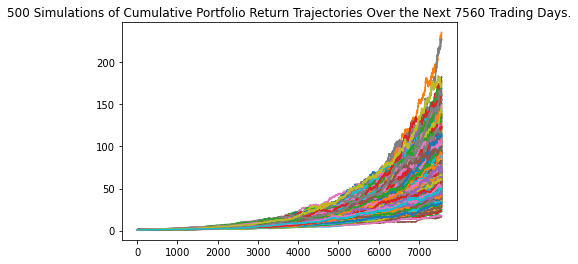

In [19]:
# Plot simulation outcomes
mc_30yr.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

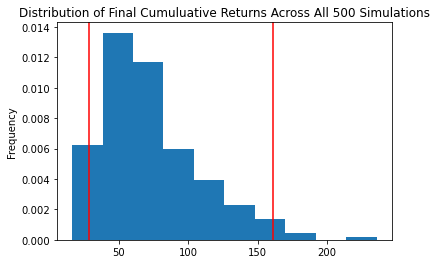

In [20]:
# Plot probability distribution and confidence intervals
mc_30yr.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_30yr_summary=mc_30yr.summarize_cumulative_return()

# Print summary statistics
mc_30yr_summary

count           500.000000
mean             73.403785
std              35.257944
min              16.680815
25%              47.207698
50%              64.933674
75%              92.072607
max             235.376824
95% CI Lower     28.625542
95% CI Upper    161.335462
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower=round(initial_investment*mc_30yr_summary.iloc[8],2)
ci_upper=round(initial_investment*mc_30yr_summary.iloc[9],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0.2f} and ${ci_upper:0.2f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $572510.84 and $3226709.24


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower=round(initial_investment*mc_30yr_summary.iloc[8],2)
ci_upper=round(initial_investment*mc_30yr_summary.iloc[9],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $858766.25 and $4840063.86


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_5yr= MCSimulation(portfolio_data=df_stock_data, weights=[.05,.95], num_simulation=500, num_trading_days=252*5)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_5yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003575,0.993914,0.997023,1.006692,0.995965,1.000531,1.001744,1.007030,1.006005,0.987798,...,0.995478,0.994673,1.007400,0.999204,1.018756,0.999917,1.003100,1.002866,0.996437,0.994104
2,1.000186,0.991090,1.017921,1.006250,0.995333,1.008171,1.012364,0.999684,0.994623,0.990642,...,0.994010,0.982443,1.002205,0.997576,1.026192,0.984226,1.018703,1.017688,0.993383,0.988443
3,1.005566,0.982983,1.010932,1.013376,0.993324,1.019129,1.014928,1.007372,1.007768,0.982274,...,0.990000,0.981017,1.008919,0.990164,1.020690,0.984603,1.020000,1.010909,1.002143,0.991348
4,1.011503,0.989720,1.024149,1.011439,0.990868,1.014103,1.026164,1.000598,1.002027,0.986916,...,0.989895,0.980331,1.011018,0.992514,1.017621,0.980257,1.022107,1.018722,0.996000,0.997237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,4.632591,3.940764,3.943234,3.038866,2.188397,3.624577,3.519374,3.263106,4.164871,3.358132,...,2.730186,3.524394,3.452794,2.751131,3.686334,4.714895,3.358894,3.926281,4.009801,3.543790
1257,4.624455,3.943728,3.903800,3.020019,2.184934,3.615907,3.518406,3.230651,4.185872,3.425750,...,2.729343,3.529888,3.425458,2.744853,3.728986,4.733698,3.342388,3.939650,4.063332,3.589375
1258,4.588980,3.958865,3.952704,3.008837,2.206154,3.659620,3.525594,3.251794,4.179756,3.442928,...,2.728810,3.540335,3.402874,2.727208,3.745064,4.732655,3.364241,3.989562,4.057988,3.536908
1259,4.592105,3.991521,4.033316,3.019575,2.195629,3.590290,3.484425,3.235248,4.119531,3.476590,...,2.750509,3.587020,3.396531,2.766059,3.786447,4.780036,3.373354,4.038445,4.015163,3.513425


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

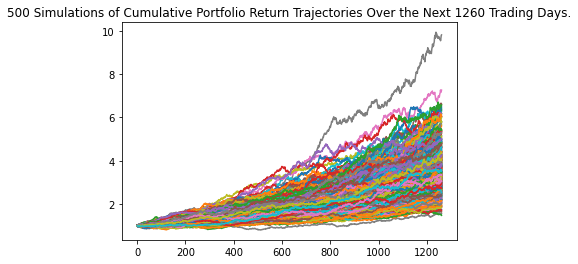

In [26]:
# Plot simulation outcomes
mc_5yr.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

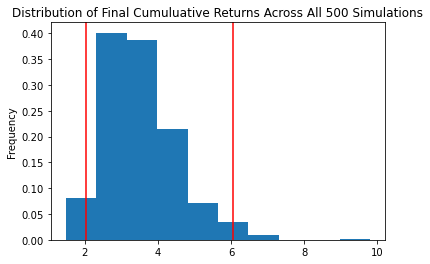

In [27]:
# Plot probability distribution and confidence intervals
mc_5yr.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_5yr_summary=mc_5yr.summarize_cumulative_return()


# Print summary statistics
mc_5yr_summary

count           500.000000
mean              3.506055
std               0.989674
min               1.481205
25%               2.843335
50%               3.331767
75%               4.039358
max               9.807125
95% CI Lower      2.024406
95% CI Upper      6.044677
Name: 1260, dtype: float64

In [29]:
# Set initial investment
initial_investment=20000 * 26

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five=round(initial_investment*mc_5yr_summary.iloc[8],2)
ci_upper_five=round(initial_investment*mc_5yr_summary.iloc[9],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $520000 in the portfolio over the next 5 years will end within in the range of $1052691.14 and $3143232.08


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_10yr= MCSimulation(portfolio_data=df_stock_data, weights=[.20,.80], num_simulation=500, num_trading_days=252*10)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_10yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007884,0.992917,0.996151,1.019958,1.006001,1.001146,0.998447,0.989777,1.002715,0.996995,...,1.016374,1.003309,0.999354,1.001703,0.997440,0.998906,1.000962,0.992423,0.991452,1.007038
2,1.007943,0.984650,0.988413,1.027260,1.010931,0.996619,0.991958,0.984120,0.993813,0.986325,...,1.028798,1.008293,1.002485,0.995291,0.996871,0.994702,0.989038,0.999097,0.999403,1.007619
3,1.015052,0.989611,0.991030,1.037004,1.017349,0.999042,0.989162,0.985192,0.997223,0.989122,...,1.026532,1.005653,0.987890,0.985781,0.986393,0.999700,0.980557,1.005274,1.001565,1.012988
4,1.025362,0.977157,0.996455,1.052906,1.024700,1.010982,0.992333,0.987003,1.000853,0.986636,...,1.035400,1.013991,0.986026,0.989486,0.978011,0.992421,0.983517,0.999880,0.995584,1.000714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.916927,6.319051,8.453877,13.076764,7.141127,8.383344,13.553143,13.126808,12.600006,4.573825,...,13.234682,7.784292,10.649731,6.102720,8.641346,6.457376,6.623726,7.096452,14.309324,3.824414
2517,5.944152,6.361890,8.495532,13.135129,7.142866,8.307113,13.476986,13.098318,12.631573,4.590088,...,13.126630,7.754290,10.616050,6.127531,8.758130,6.551209,6.538771,7.102365,14.381040,3.776451
2518,5.965493,6.383532,8.483919,13.102784,7.126913,8.344101,13.335001,13.150692,12.502669,4.560805,...,13.203162,7.760046,10.587780,6.143748,8.749556,6.618479,6.484420,7.077954,14.321860,3.775053
2519,6.086418,6.407593,8.485078,13.207713,7.077338,8.399999,13.429973,13.167429,12.586323,4.572044,...,13.215943,7.754703,10.702493,6.145880,8.820725,6.679889,6.458169,7.053477,14.401908,3.765859


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

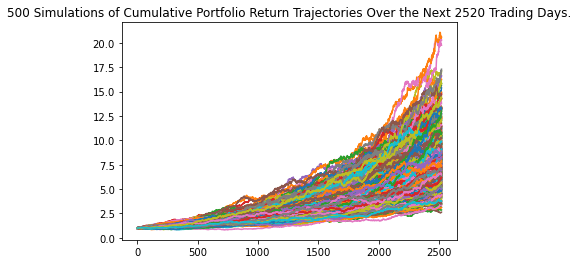

In [32]:
# Plot simulation outcomes
mc_10yr.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

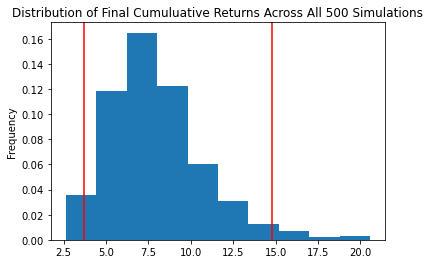

In [33]:
# Plot probability distribution and confidence intervals
mc_10yr.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_10yr_summary=mc_10yr.summarize_cumulative_return()

# Print summary statistics
mc_10yr_summary

count           500.000000
mean              7.997047
std               2.834494
min               2.631540
25%               6.026185
50%               7.557806
75%               9.293961
max              20.572941
95% CI Lower      3.725433
95% CI Upper     14.813271
Name: 2520, dtype: float64

In [36]:
# Set initial investment
initial_investment=20000 * 11

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten=round(initial_investment*mc_10yr_summary.iloc[8],2)
ci_upper_ten=round(initial_investment*mc_10yr_summary.iloc[9],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $220000 in the portfolio over the next 10 years will end within in the range of $819595.32 and $3258919.6
